# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
from citipy import citipy
import random
import requests
from pprint import pprint
from config import mykey
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress



## Generate Cities List

In [34]:

# Min and Max Latitude is -90 and +90
# Min and Max Longtitude is -180 and +180
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #for Fahreneit



cities = []
d_cities = []

d_max_temp = []
d_humidity = []
d_lat      = []
d_lon      = []
d_country  = []
d_wind_spd = []
d_date     = []
d_clouds   = []
d_ids      = []

record_number = 0

#
# ****************************** Northern Hemisphere cities ******************************
# Instead of creating cities series and trying the weather API, I choose loops to check the weather API result 
# and create the data frame.
#
# Northern hemisphere: 90°0′0″N 0°0′0″E 
# I looped the northern and southern hemisphere separately to create a homogenic data series.
# ****************************** Northern Hemisphere cities ******************************
while len(d_cities)<250:
    
    record_number+=1

    northern_lat = random.sample(range(0, 90),1)
    random.shuffle(northern_lat)     

    longtitude =  random.sample(range(-180, +180),1)
    random.shuffle(longtitude)
    
    city = citipy.nearest_city(int(northern_lat[0]), int(longtitude[0]))    

    print(f"Processing Record {record_number} | {city.city_name}")

    if [city.city_name,city.country_code] not in cities:

        query_url = f"{url}appid={mykey}&q={city.city_name}&units={units}"

        try:
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
  
            if weather_json['cod'] == 200:

                if (int(weather_json["coord"]["lat"]))<0:
                    continue    

                d_max_temp.append(weather_json["main"]["temp_max"])
                d_humidity.append(weather_json["main"]["humidity"])
                d_lat.append(weather_json["coord"]["lat"])
                d_lon.append(weather_json["coord"]["lon"])
                d_country.append(weather_json["sys"]["country"])
                d_wind_spd.append(weather_json["wind"]["speed"])
                d_date.append(weather_json["dt"])
                d_clouds.append(weather_json["clouds"]['all'])
                d_cities.append(city.city_name)    
                            
            elif weather_json['cod'] == '404':
                print(f"City not found. Skipping...") 
            else:
                print(f"Unexpected Error during API Call") 

        except KeyError:
                print(f"Unexpected Error during building listing") 

        city_name = city.city_name
        cities.append([city.city_name,city.country_code])
    else:
        print(f"Duplicate city. Skipping...") 
      
#
# ****************************** Southern Hemisphere cities ******************************
# 250 Northern hemisphere cities has been successfully saved. 
# 
# Southern hemisphere: 0°0′0″ to -90°0′0″
# I looped the northern and southern hemisphere separately to create a homogenic data series.
# ****************************** Northern Hemisphere cities ******************************

while len(d_cities)<500: 
    
    record_number+=1

    southern_lat = random.sample(range(-90, 0),1)
    random.shuffle(southern_lat)     

    longtitude =  random.sample(range(-180, +180),1)
    random.shuffle(longtitude)
    
    city = citipy.nearest_city(int(southern_lat[0]), int(longtitude[0]))    

    print(f"Processing Record {record_number} | {city.city_name}")

    if [city.city_name,city.country_code] not in cities:

        query_url = f"{url}appid={mykey}&q={city.city_name}&units={units}"

        try:
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
  
            if weather_json['cod'] == 200:

                
                if (int(weather_json["coord"]["lat"]))>0:
                    continue    

                d_max_temp.append(weather_json["main"]["temp_max"])
                d_humidity.append(weather_json["main"]["humidity"])
                d_lat.append(weather_json["coord"]["lat"])
                d_lon.append(weather_json["coord"]["lon"])
                d_country.append(weather_json["sys"]["country"])
                d_wind_spd.append(weather_json["wind"]["speed"])
                d_date.append(weather_json["dt"])
                d_clouds.append(weather_json["clouds"]['all'])
                d_cities.append(city.city_name)                
            elif weather_json['cod'] == '404':
                print(f"City not found. Skipping...") 
            else:
                print(f"Unexpected Error during API Call") 

        except KeyError:
                print(f"Unexpected Error during building listing") 

        city_name = city.city_name
        cities.append([city.city_name,city.country_code])
    else:
        print(f"Duplicate city. Skipping...") 
      


Processing Record 1 | half moon bay
Processing Record 2 | gangotri
City not found. Skipping...
Processing Record 3 | ribeira grande
Processing Record 4 | husavik
Processing Record 5 | nikolskoye
Processing Record 6 | aswan
Processing Record 7 | ranong
Processing Record 8 | yagodnoye
Processing Record 9 | ponta do sol
Processing Record 10 | iqaluit
Processing Record 11 | airai
Processing Record 12 | clyde river
Processing Record 13 | butaritari
Processing Record 14 | saskylakh
Processing Record 15 | hilo
Processing Record 16 | deputatskiy
Processing Record 17 | atuona
Processing Record 18 | ponta do sol
Duplicate city. Skipping...
Processing Record 19 | cherskiy
Processing Record 20 | samusu
City not found. Skipping...
Processing Record 21 | college
Processing Record 22 | sinnamary
Processing Record 23 | nyurba
Processing Record 24 | bonfim
Processing Record 25 | taldan
Processing Record 26 | chokurdakh
Processing Record 27 | manadhoo
Processing Record 28 | severo-kurilsk
Processing Rec

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
cities_df = pd.DataFrame({            
            'city':d_cities,
            'Max Temp':d_max_temp,
            'Lat':d_lat,
            'Lng':d_lon,             
            'Humidity':d_humidity,
            'Cloudiness':d_clouds,
            'Wind Speed': d_wind_spd,
            'country':d_country,
            "Date": d_date
        })

cities_df.index.name = 'City ID'


In [36]:
cities_df.to_csv('output/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
print("The following cities have humutiy over 100%")
pprint(cities_df.loc[cities_df["Humidity"] > 100])

cities_df = cities_df.loc[cities_df["Humidity"] <= 100]

The following cities have humutiy over 100%
Empty DataFrame
Columns: [city, Max Temp, Lat, Lng, Humidity, Cloudiness, Wind Speed, country, Date]
Index: []


In [38]:
#  Get the indices of cities that have humidity over 100%.
cities_df.describe()

,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,67.114780,9.693816,16.682656,68.366000,56.966000,8.066660,1.655120e+09
std,16.808349,35.076187,93.263064,23.365786,38.251578,5.778569,2.076014e+02
min,27.430000,-54.800000,-179.166700,1.000000,0.000000,0.000000,1.655120e+09
25%,53.947500,-19.989750,-60.351575,56.750000,20.000000,3.627500,1.655120e+09
50%,70.930000,-0.659650,15.219300,75.000000,68.500000,6.630000,1.655120e+09
75%,79.350000,39.226500,108.060150,86.000000,97.000000,11.340000,1.655121e+09
max,110.930000,78.218600,179.316700,100.000000,100.000000,34.760000,1.655121e+09


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data= cities_df[(np.abs(stats.zscore(cities_df["Humidity"])) < 3)]
clean_city_data.describe()


,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,67.114780,9.693816,16.682656,68.366000,56.966000,8.066660,1.655120e+09
std,16.808349,35.076187,93.263064,23.365786,38.251578,5.778569,2.076014e+02
min,27.430000,-54.800000,-179.166700,1.000000,0.000000,0.000000,1.655120e+09
25%,53.947500,-19.989750,-60.351575,56.750000,20.000000,3.627500,1.655120e+09
50%,70.930000,-0.659650,15.219300,75.000000,68.500000,6.630000,1.655120e+09
75%,79.350000,39.226500,108.060150,86.000000,97.000000,11.340000,1.655121e+09
max,110.930000,78.218600,179.316700,100.000000,100.000000,34.760000,1.655121e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

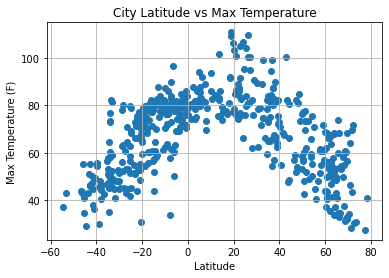

In [40]:

plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs Max Temperature')
plt.savefig("output/Latitude vs Temperature.png")  
plt.show()

## Latitude vs. Humidity Plot

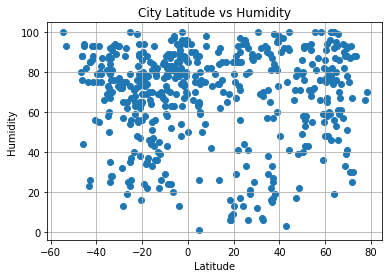

In [41]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Latitude vs Humidity')
plt.savefig("output/Latitude vs Humidity.png")  
plt.show()

## Latitude vs. Cloudiness Plot

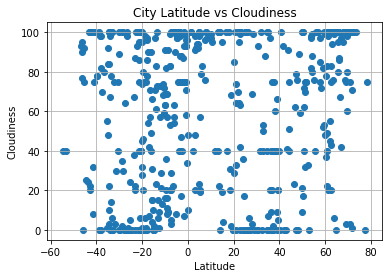

In [42]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('City Latitude vs Cloudiness')
plt.savefig("output/Latitude vs Cloudiness.png")  
plt.show()

## Latitude vs. Wind Speed Plot

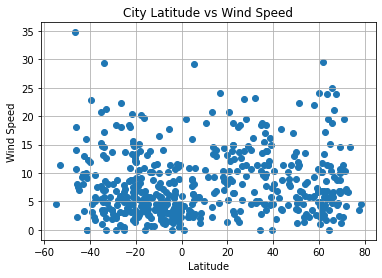

In [43]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('City Latitude vs Wind Speed')
plt.savefig("output/Latitude vs Wind Speed.png")  
plt.show()

## Linear Regression

In [44]:
northern_df =  clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_df =  clean_city_data.loc[clean_city_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.7475778278413716


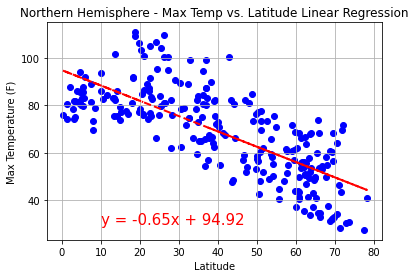

In [45]:
y_values = northern_df['Max Temp']
x_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Northern Hemisphere Max Temp vs Latitude Linear Regression.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7141221435719483


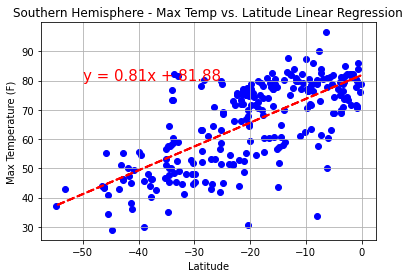

In [46]:
y_values = southern_df['Max Temp']
x_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Southern Hemisphere Max Temp vs Latitude Linear Regression.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.10548659894786737


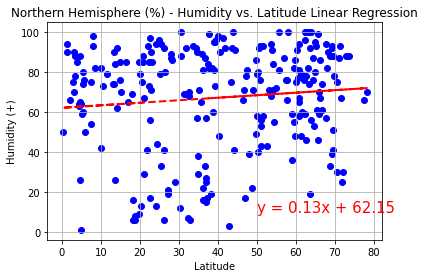

In [47]:
y_values = northern_df['Humidity']
x_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.ylabel('Humidity (+)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Northern Hemisphere (%) - Humidity vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Northern Hemisphere Humidity vs Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.00838230212724635


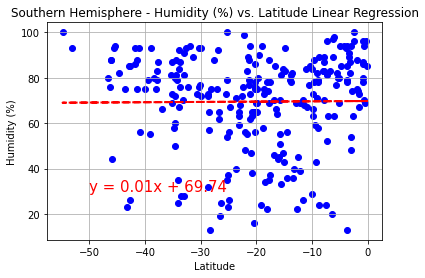

In [48]:
y_values = southern_df['Humidity']
x_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Southern Hemisphere Humidity vs Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.14556215846066056


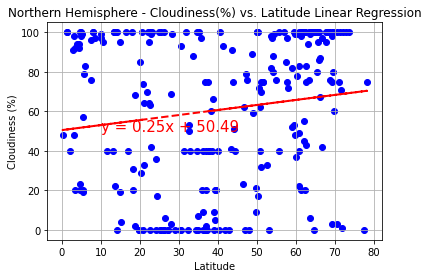

In [49]:
y_values = northern_df['Cloudiness']
x_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Northern Hemisphere Cloudiness vs Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.05984022394667442


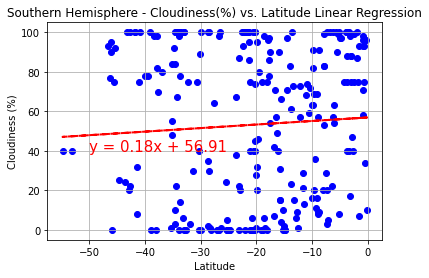

In [50]:
y_values = southern_df['Cloudiness']
x_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Southern Hemisphere Cloudiness vs Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.03227307117513546


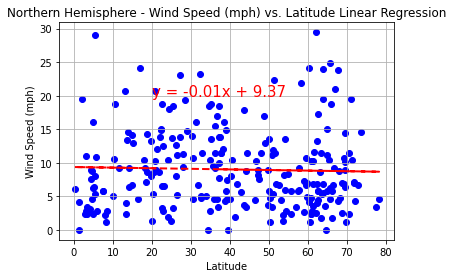

In [51]:
y_values = northern_df['Wind Speed']
x_values = northern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Northern Hemisphere Wind Speed vs Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2599938262873053


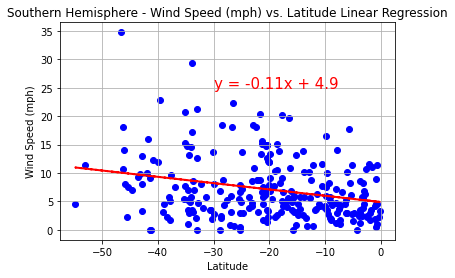

In [52]:
y_values = southern_df['Wind Speed']
x_values = southern_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,color='blue')
plt.plot(x_values,regress_values, color='red', linestyle='--', linewidth=2)
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
plt.savefig('output/Southern Hemisphere Wind Speed vs Latitude Linear Regression.png')
plt.show()